## Maddison Project 


In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML

display(HTML("<style>.container { width:70% !important; }</style>"))
df = pd.read_excel(r"C:\Users\guiao\JUPYTER\data\mpd2020.xlsx", sheet_name="Full data")
df = df.fillna(method='bfill')
df['gdp'] = (df['gdppc'] * df['pop']).astype('int64')
df['pop'] = (df['pop']).astype('int64')
#errenous data
df = df.drop(18263)




In [2]:
df

,countrycode,country,year,gdppc,pop,gdp
0,AFG,Afghanistan,1820,1156.0000,3280,3791680
1,AFG,Afghanistan,1870,1156.0000,4207,4863292
2,AFG,Afghanistan,1913,1156.0000,5730,6623880
3,AFG,Afghanistan,1950,1156.0000,8150,9421400
4,AFG,Afghanistan,1951,1170.0000,8284,9692280
...,...,...,...,...,...,...
21677,ZWE,Zimbabwe,2014,1594.0000,13313,21222503
21678,ZWE,Zimbabwe,2015,1560.0000,13479,21027455
21679,ZWE,Zimbabwe,2016,1534.0000,13664,20961794
21680,ZWE,Zimbabwe,2017,1582.3662,13870,21947837


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21681 entries, 0 to 21681
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   countrycode  21681 non-null  object 
 1   country      21681 non-null  object 
 2   year         21681 non-null  int64  
 3   gdppc        21681 non-null  float64
 4   pop          21681 non-null  int64  
 5   gdp          21681 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.2+ MB


In [4]:
df['countrycode'].unique()

array(['AFG', 'AGO', 'ALB', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE',
       'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BIH', 'BLR',
       'BOL', 'BRA', 'BRB', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CHN',
       'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM', 'CPV', 'CRI', 'CSK',
       'CUB', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA',
       'ECU', 'EGY', 'ESP', 'EST', 'ETH', 'FIN', 'FRA', 'GAB', 'GBR',
       'GEO', 'GHA', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GTM', 'HKG',
       'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ',
       'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ',
       'KHM', 'KOR', 'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LKA',
       'LSO', 'LTU', 'LUX', 'LVA', 'MAR', 'MDA', 'MDG', 'MEX', 'MKD',
       'MLI', 'MLT', 'MMR', 'MNE', 'MNG', 'MOZ', 'MRT', 'MUS', 'MWI',
       'MYS', 'NAM', 'NER', 'NGA', 'NIC', 'NLD', 'NOR', 'NPL', 'NZL',
       'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRI', 'PRK', 'PRT',
       'PRY', 'PSE',

In [5]:
def country_history(code,start,end):
    country_data = df.loc[df['countrycode'] == code]
    time_frame = country_data.loc[country_data['year'] > int(start)]
    time_frame = time_frame.loc[country_data['year'] < int(end)]
    year = time_frame['year'].tolist()
    pop = time_frame['pop'].tolist()
    gdppc = time_frame['gdppc'].tolist()

    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Year',fontsize=30)
    ax1.set_ylabel('Population in thousands',fontsize=30)
    ax1.plot(year, pop, color='green',label='Population')

    ax1.tick_params( colors='#EE7600', which = 'both',labelsize=20)       
    ax2 = ax1.twinx()
    ax2.set_ylabel('GDP per capita $',fontsize=30)
    ax2.plot(year, gdppc, label='GDP per capita')
    ax2.tick_params( colors='#EE7600', which = 'both',labelsize=20)
#   ax1.legend(loc='upper left')
    ax2.legend(loc='upper left', fontsize=20)


    plt.title(time_frame.iloc[0]['country'], color='#5374bf',fontsize=36)
    plt.grid(linewidth = 0.8)





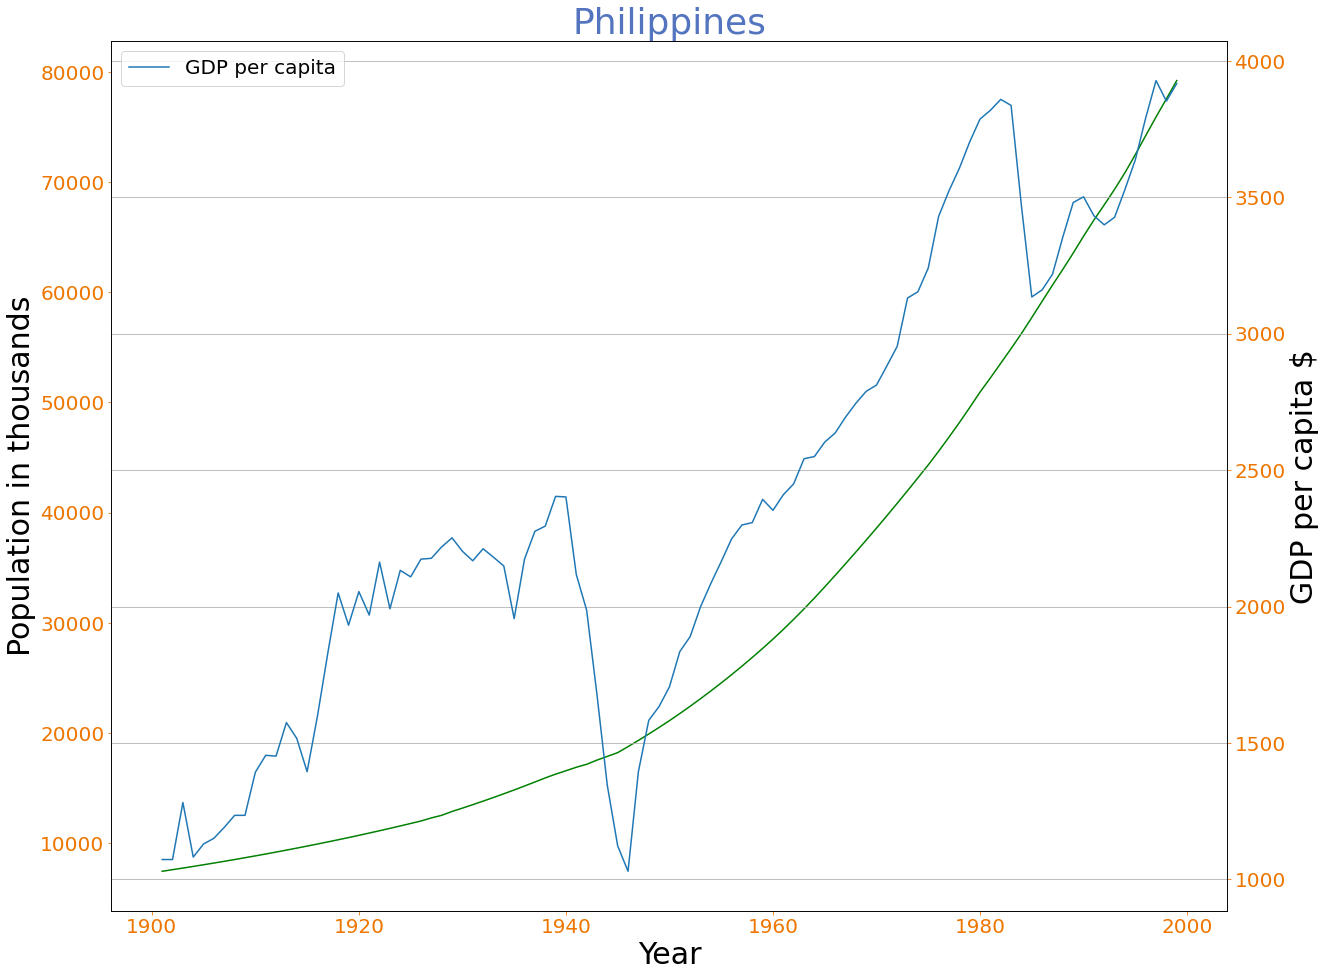

In [13]:
country_history(code = 'PHL', start = 1900,end = 2000)

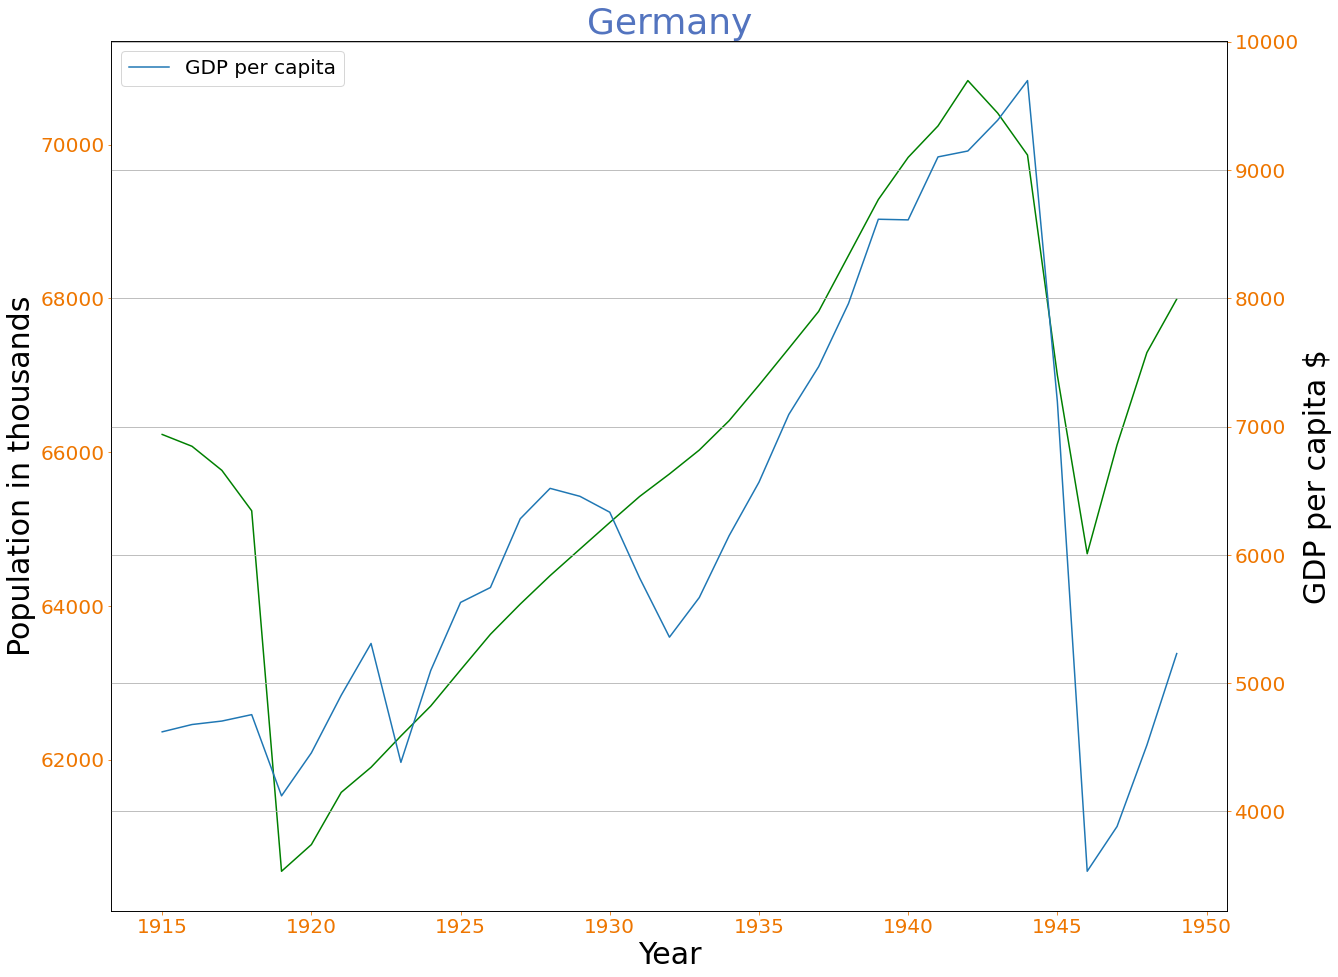

In [14]:
country_history(code = 'DEU', start = 1914,end = 1950) #World War 1 and 2

In [8]:
import matplotlib.lines as mlines
#year = int(input("Year (1500-2018): "))
def world_data_scatter(year):
    year_table = df.loc[df['year'] == int(year)]

    year_table = year_table.sort_values(by=['gdp'], ascending=False)
    country_codes = year_table['countrycode'].tolist()
    country = year_table['country'].tolist()
    gdppc = year_table['gdppc'].tolist()
    pop = year_table['pop'].tolist()
    gdp = year_table['gdp'].tolist()

    import pycountry_convert as pc
    continent = []
    for i in country_codes: 
        try:
            alpha2code = pc.country_alpha3_to_country_alpha2(i)
            continent.append(pc.country_alpha2_to_continent_code(alpha2code))
        except:
            continent.append(pd.NaT)
    year_table['continent'] = continent
    continent_to_color = []
    for val in continent:
        if val == 'AS':
            continent_to_color.append("#F6BE00") #dark yellow
        elif val == 'AF':
            continent_to_color.append("red")
        elif val == 'EU':
            continent_to_color.append("blue")
        elif val == 'NA':
            continent_to_color.append("green")
        elif val == 'SA':
            continent_to_color.append("purple")
        elif val == 'OC':
            continent_to_color.append("orange")
        else:
            continent_to_color.append("gray")

    if year > 2000:
        size = [n  // 1000000 for n in gdp]
    elif year > 1950:
        size = [n  // 800000 for n in gdp]
    elif year > 1900:
        size = [n  // 200000 for n in gdp]
    elif year > 1850:
        size = [n  // 50000 for n in gdp]
    elif year > 1800:
        size = [n  // 10000 for n in gdp]
    elif year > 1700:
        size = [n  // 5000 for n in gdp]
    elif year > 1600:
        size = [n  // 3000 for n in gdp]
    else:
        size = [n  // 2000 for n in gdp]
    #size = [n // 50 for n in pop]


    plt.rcParams["figure.figsize"] = (20,16)

    fig, ax = plt.subplots()
    ax.set_xscale('log')
    ax.set_xticks([100,1000,10000,100000,100000,1000000])
    ax.set_yscale('log')
    ax.set_yticks([100,1000,2500,5000,10000,25000,50000,100000])

    ax.scatter(x=pop,y=gdppc, s= size, color= continent_to_color)

    plt.xlabel('pop in thousands',fontsize=30)
    plt.ylabel('gdp per capita $',fontsize=30)
    plt.title(year, color= '#EE7600',fontsize=40)

    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.tick_params( colors='#EE7600', which = 'both',labelsize=20)
    plt.grid(linewidth = 0.4)

    pop_mean = year_table.mean(axis='index', numeric_only = True)['pop']
    gdppc_mean = year_table.mean(axis='index', numeric_only = True)['gdppc']
    ax.axhline(gdppc_mean, linestyle='--', color='k', label='gdppc mean')
    ax.axvline(pop_mean, linestyle='--', color='#862633', label='pop mean')
    plt.legend(loc="upper left",fontsize=20)

    #Eight Largest GDP
    if year > 1950: 
        for i, country in enumerate(country[0:8]):
            ax.annotate(country, (pop[i], gdppc[i]), fontsize=20)
    elif year > 1900:
        for i, country in enumerate(country[0:12]):
            ax.annotate(country, (pop[i], gdppc[i]), fontsize=20)
    elif year > 1800:
        for i, country in enumerate(country[0:16]):
            ax.annotate(country, (pop[i], gdppc[i]), fontsize=20)
    else:
        for i, country in enumerate(country[0:20]):
            ax.annotate(country, (pop[i], gdppc[i]), fontsize=20)
    ### 2018 Graph Extra Information
    if year == 2018:
        #Richest
        ax.annotate('Qatar', (pop[45], gdppc[45]), fontsize=20)
        ax.annotate('Norway', (pop[41], gdppc[41]), fontsize=20)
        ax.annotate('UAE', (pop[29], gdppc[29]), fontsize=20)
        #Least pop not minor nation
        ax.annotate('Dominica', (pop[167], gdppc[167]), fontsize=20)
        #Poorest
        ax.annotate('Central African Republic', (pop[159], gdppc[159]), fontsize=20)
        ax.annotate('Liberia', (pop[157], gdppc[157]), fontsize=20)
        ax.annotate('Niger', (pop[143], gdppc[143]), fontsize=20)
        ax.annotate('DR of Congo', (pop[92], gdppc[92]), fontsize=20)

    

### Circle Size = Country GDP
### Color = Continent
1. North America = Green
2. South America = Purple
3. Europe = Blue
4. Africa = Red
5. Asia = Orange 
6. Ocenia = Yellow





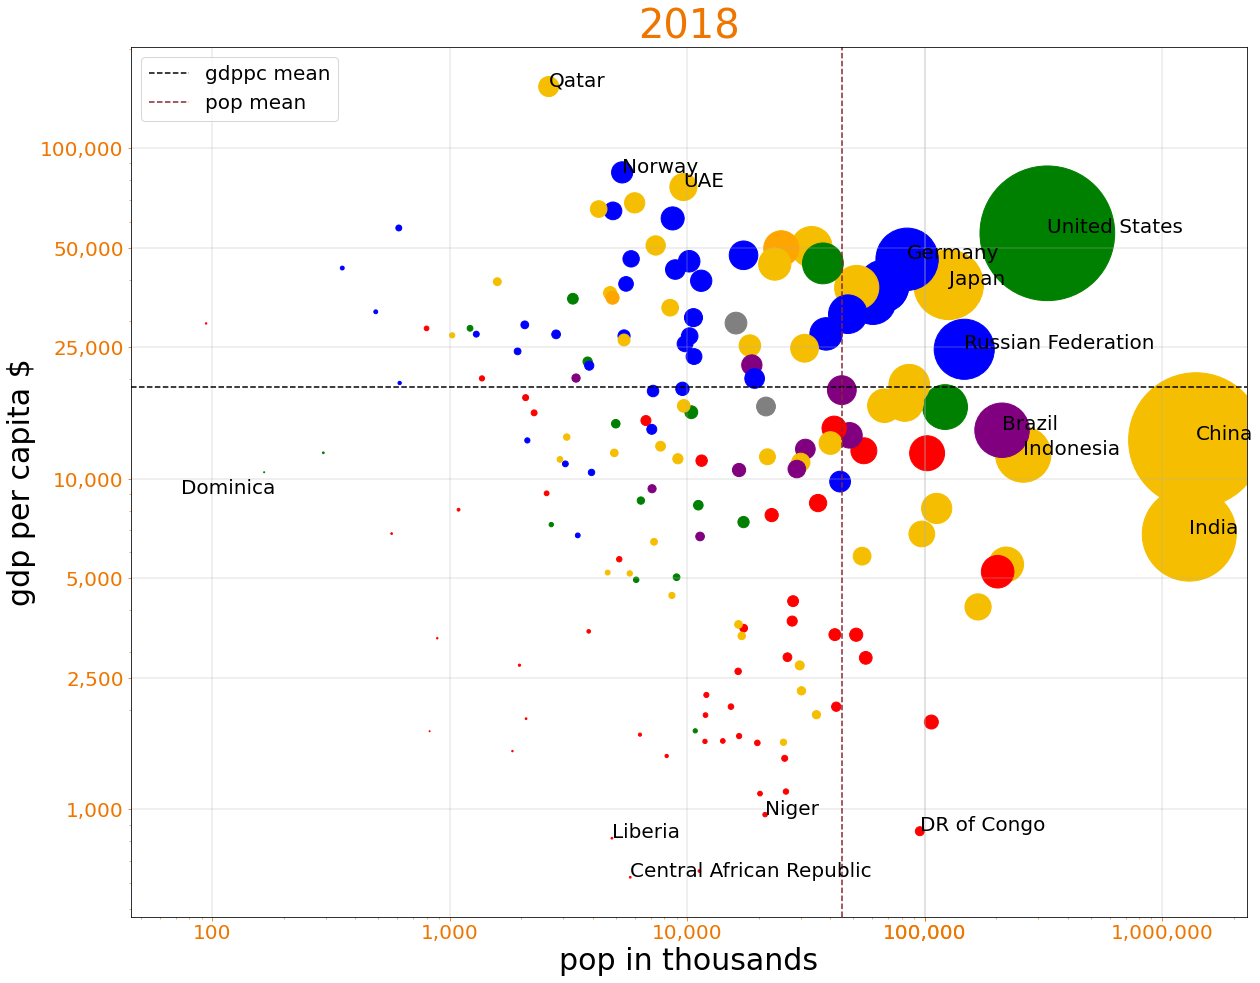

In [9]:
world_data_scatter(2018)

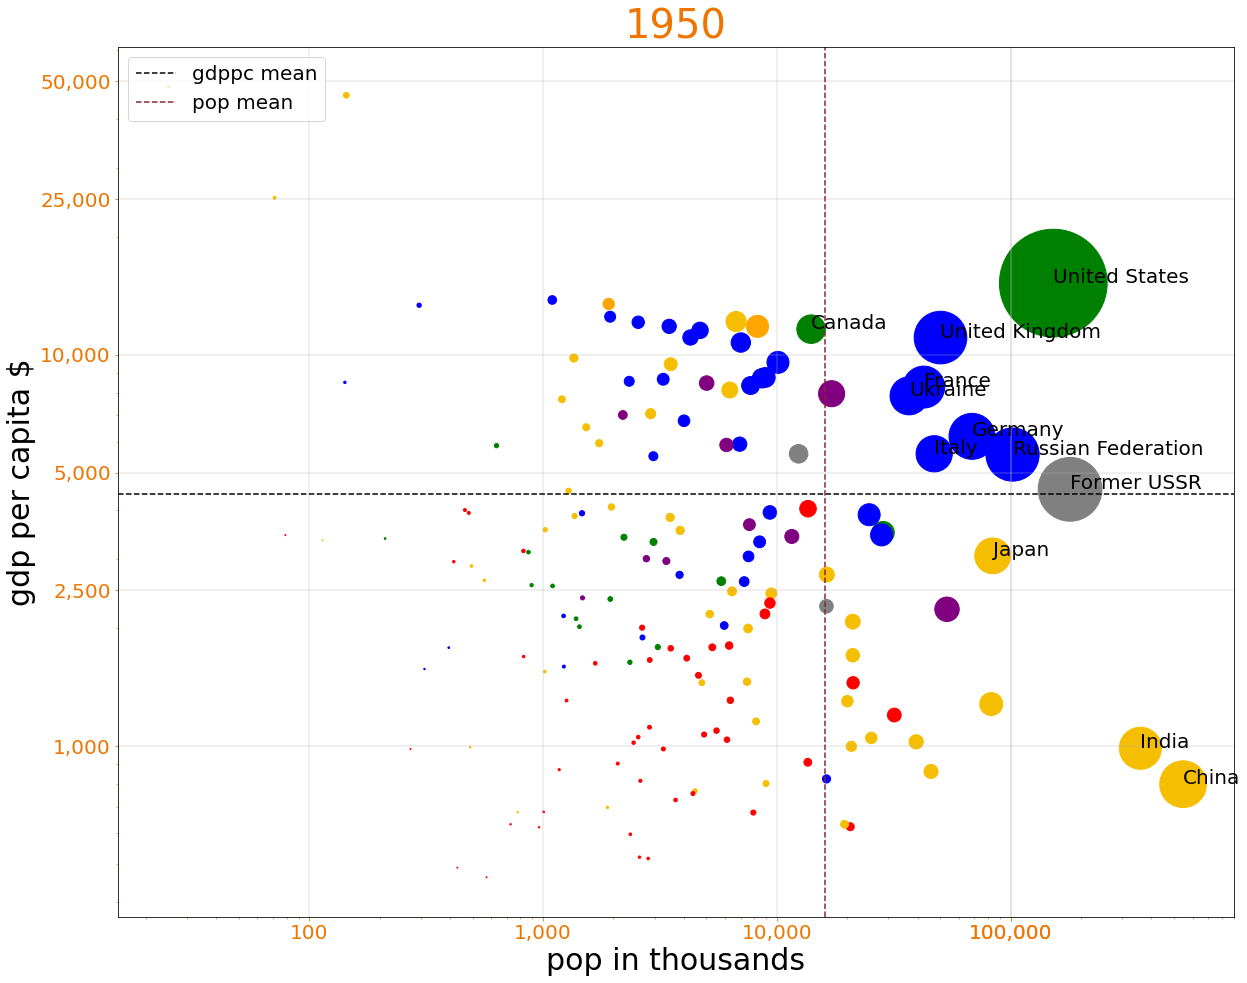

In [10]:
world_data_scatter(1950)

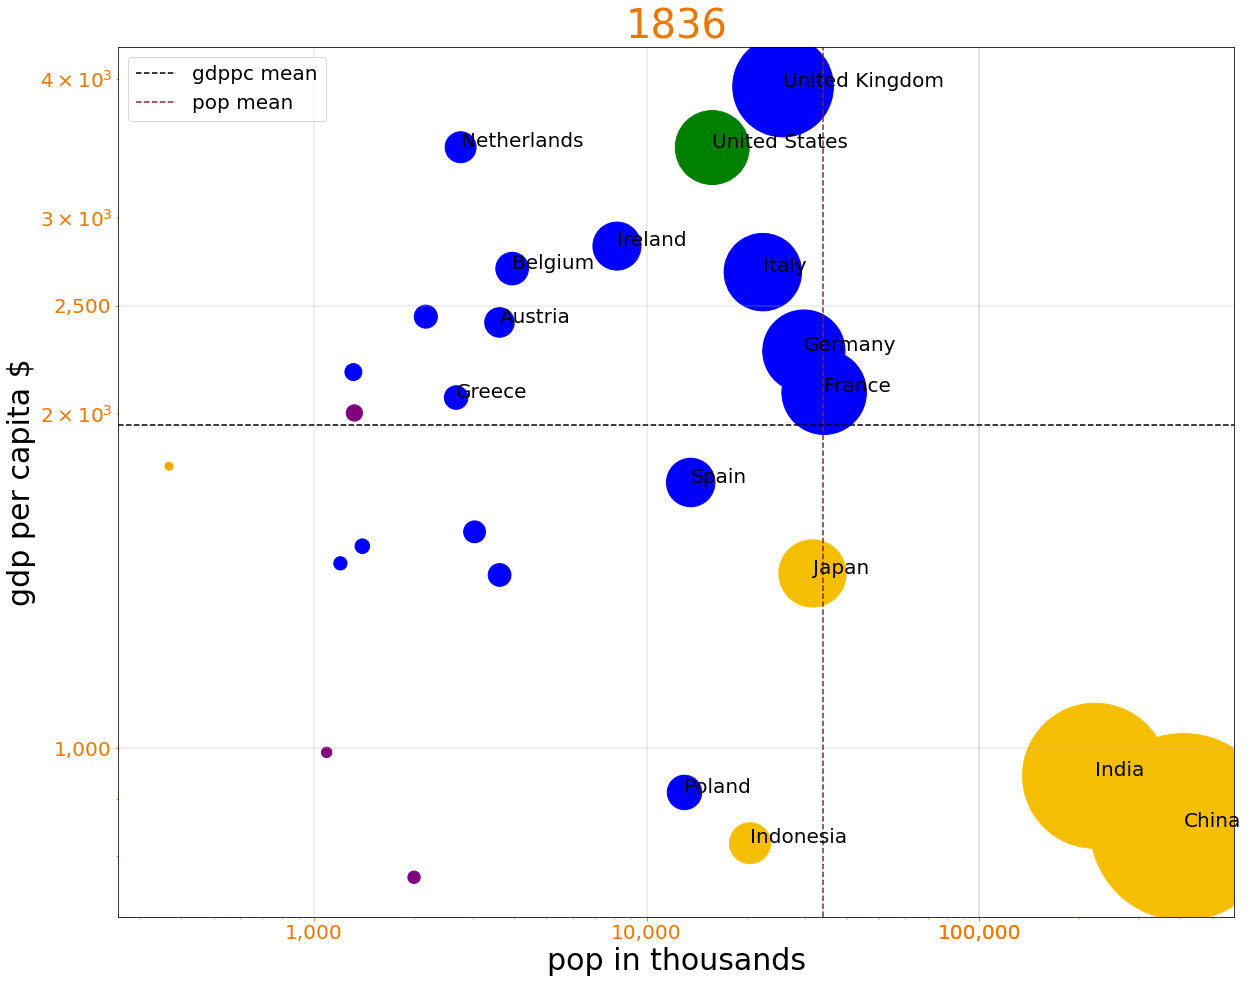

In [11]:
world_data_scatter(1836)

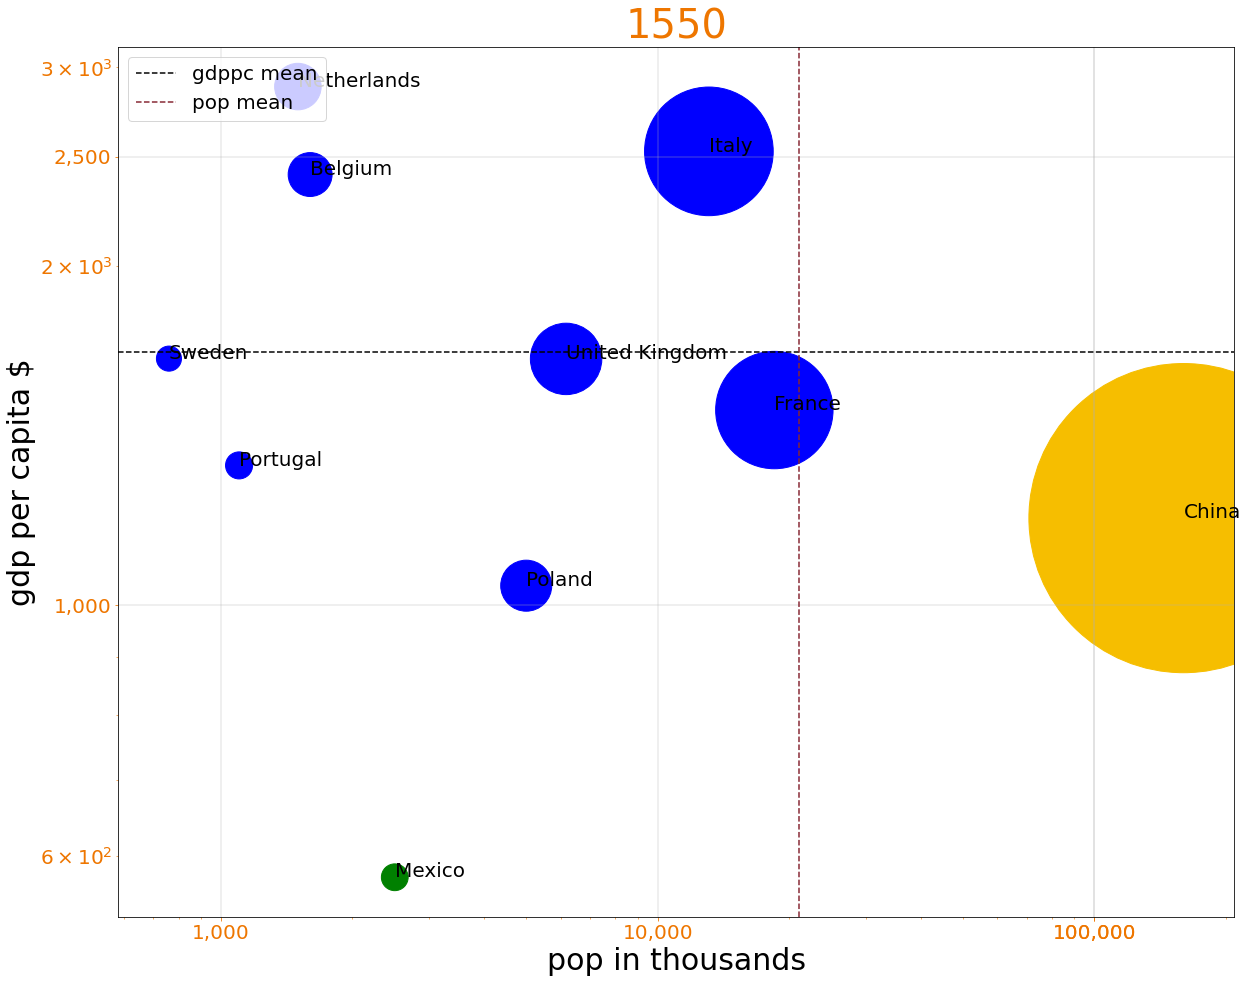

In [12]:
world_data_scatter(1550)

Sources: https://www.rug.nl/ggdc/historicaldevelopment/maddison/releases/maddison-project-database-2020?lang=en

Maddison Project Database, version 2020. Bolt, Jutta and Jan Luiten van Zanden (2020), “Maddison style estimates of the evolution of the world economy. A new 2020 update ”.
